In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE  # imblearn library can be installed in Visual Studio by going into Python Environment -> Install new package -> imblearn package
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

In [3]:
# Importing dataset and examining it
dataset = pd.read_csv("Titanic.csv")
dataset = dataset.drop('Embarked', axis = 1)
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500
(712, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   Fare      712 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 27.9+ KB
None
         Survived      Pclass         Age        Fare
count  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093   34.567251
std      0.491139    0.836854   14.492933   52.938648
min      0.000000    1.000000    0.420000    0.000000
25%      0.000000 

In [4]:
# Converting Categorical features into Numerical features
dataset['Sex'] = dataset['Sex'].map({'male':1, 'female':0})

# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')

'corrheatmap.html'

In [5]:
# Dividing dataset into label and feature sets
X = dataset.drop(['Survived', 'Fare'], axis = 1) # Features
Y = dataset['Survived'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(712, 3)
(712,)


In [6]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(498, 3)
(214, 3)


In [7]:
# Implementing Oversampling to balance the dataset; SMOTE stands for Synthetic Minority Oversampling TEchnique
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())

Number of observations in each class before oversampling (training data): 
 0    300
1    198
Name: Survived, dtype: int64
Number of observations in each class after oversampling (training data): 
 1    300
0    300
Name: Survived, dtype: int64


Age       0.544751
Sex       0.259808
Pclass    0.195441
dtype: float64


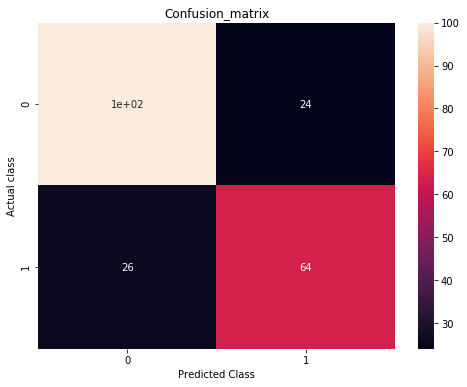

Confusion matrix: 
 [[100  24]
 [ 26  64]]
TP:  64
TN:  100
FP:  24
FN:  26


In [8]:
# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])


In [9]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[['Age', 'Sex']]

feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

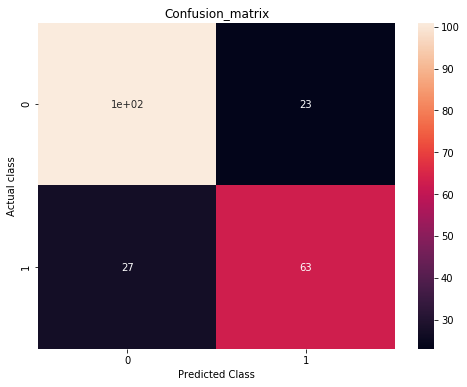

Confusion matrix: 
 [[101  23]
 [ 27  63]]
TP:  63
TN:  101
FP:  23
FN:  27


In [10]:
rfc = RandomForestClassifier(n_estimators=400, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])